# Figure 9

**Figure 9.** Impact of cloud horizontal heterogeneity and vertical overlap on CRH that are not resolved at 2.5 km horizontal resolution. The CRH differences are calculated between the LEM reference calculation and the radiative transfer calculations for the homogeneous NWP clouds (NWP - LEM), with the solid lines for the homogeneous grid-box clouds (without overlap assumption) and the dotted lines for the homogeneous clouds with fractional cloud cover (with overlap assumption). Note the different x and y-axes for panels (a) and (b).

---
@ Behrooz Keshtgar, KIT 2024

## 1- load python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import colorlegend
import warnings
warnings.filterwarnings("ignore")

For reference, print package versions to screen:

In [2]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.16.0
numpy:      1.23.5
matplotlib: 3.3.0


In [3]:
import dask
from dask.distributed import Client, progress, wait
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})
client = Client()
client

<Client: 'tcp://127.0.0.1:42777' processes=16 threads=256, memory=522.84 GB>

## 2- Loading datasets

In [4]:
# Dictionary for loading datasets for the 4 LEM domains
domdict = {
         'shallow_cumulus'          : {'res':'300m'}, 
         'WCB_ascent'               : {'res':'300m'}, 
         'WCB_cyclonic_outflow'     : {'res':'300m'}, 
         'WCB_anticyclonic_outflow' : {'res':'300m'}
          }

In [5]:
# Loading icon-pp datasets
def load_data(cloud):
    list_icon = []
    for dom in list(domdict.keys()):
        path = '/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/'
        print('Working on loading data for', dom)
        ds = xr.open_dataset(path+dom+'/libradtran_pp'+cloud+'twostr_Fu.nc').chunk(chunks={'time': 1, 'height': 10})
        list_icon.append(ds)
    return list_icon
#-------------------------------------------------------------------------------------------------
list_libradtran_lem   = load_data('_')
list_libradtran_nwp   = load_data('_nwpcld_')
list_libradtran_nwpfr = load_data('_nwpfrcld_')

Working on loading data for shallow_cumulus
Working on loading data for WCB_ascent
Working on loading data for WCB_cyclonic_outflow
Working on loading data for WCB_anticyclonic_outflow
Working on loading data for shallow_cumulus
Working on loading data for WCB_ascent
Working on loading data for WCB_cyclonic_outflow
Working on loading data for WCB_anticyclonic_outflow
Working on loading data for shallow_cumulus
Working on loading data for WCB_ascent
Working on loading data for WCB_cyclonic_outflow
Working on loading data for WCB_anticyclonic_outflow


## 3- Average profiles of CRH

In [6]:
# excluding boundaries and takin domain average
# twostr with LEM and NWP clouds datasets
for dom in range(len(list_libradtran_lem)):
    for var in ['lwcrh','swcrh']:
        list_libradtran_lem[dom][var+'_mean'] = list_libradtran_lem[dom][var].isel(lon=slice(10,list_libradtran_lem[dom].lon.size-10),lat=slice(5,list_libradtran_lem[dom].lat.size-5)).mean(dim=['lat','lon','time']).compute()
        list_libradtran_nwp[dom][var+'_mean'] = list_libradtran_nwp[dom][var].isel(lon=slice(1,list_libradtran_nwp[dom].lon.size-1),lat=slice(1,list_libradtran_nwp[dom].lat.size-1)).mean(dim=['lat','lon','time']).compute()
        list_libradtran_nwpfr[dom][var+'_mean'] = list_libradtran_nwpfr[dom][var].isel(lon=slice(1,list_libradtran_nwpfr[dom].lon.size-1),lat=slice(1,list_libradtran_nwpfr[dom].lat.size-1)).mean(dim=['lat','lon','time']).compute()

### For data publication

In [16]:
# creating a dataset and save for data publication
ds_out = xr.Dataset(
    data_vars={
        "swcrh_mean_lem_dom01"     : (list_libradtran_lem[0]['swcrh_mean'].dims, list_libradtran_lem[0]['swcrh_mean'].data),
        "lwcrh_mean_lem_dom01"     : (list_libradtran_lem[0]['lwcrh_mean'].dims, list_libradtran_lem[0]['lwcrh_mean'].data),
        "swcrh_mean_nwp_dom01"     : (list_libradtran_nwp[0]['swcrh_mean'].dims, list_libradtran_nwp[0]['swcrh_mean'].data),
        "lwcrh_mean_nwp_dom01"     : (list_libradtran_nwp[0]['lwcrh_mean'].dims, list_libradtran_nwp[0]['lwcrh_mean'].data),
        "swcrh_mean_nwpfr_dom01" : (list_libradtran_nwpfr[0]['swcrh_mean'].dims, list_libradtran_nwpfr[0]['swcrh_mean'].data),
        "lwcrh_mean_nwpfr_dom01" : (list_libradtran_nwpfr[0]['lwcrh_mean'].dims, list_libradtran_nwpfr[0]['lwcrh_mean'].data),
        
        "swcrh_mean_lem_dom02"     : (list_libradtran_lem[1]['swcrh_mean'].dims, list_libradtran_lem[1]['swcrh_mean'].data),
        "lwcrh_mean_lem_dom02"     : (list_libradtran_lem[1]['lwcrh_mean'].dims, list_libradtran_lem[1]['lwcrh_mean'].data),
        "swcrh_mean_nwp_dom02"     : (list_libradtran_nwp[1]['swcrh_mean'].dims, list_libradtran_nwp[1]['swcrh_mean'].data),
        "lwcrh_mean_nwp_dom02"     : (list_libradtran_nwp[1]['lwcrh_mean'].dims, list_libradtran_nwp[1]['lwcrh_mean'].data),
        "swcrh_mean_nwpfr_dom02" : (list_libradtran_nwpfr[1]['swcrh_mean'].dims, list_libradtran_nwpfr[1]['swcrh_mean'].data),
        "lwcrh_mean_nwpfr_dom02" : (list_libradtran_nwpfr[1]['lwcrh_mean'].dims, list_libradtran_nwpfr[1]['lwcrh_mean'].data),
        
        "swcrh_mean_lem_dom03"     : (list_libradtran_lem[2]['swcrh_mean'].dims, list_libradtran_lem[2]['swcrh_mean'].data),
        "lwcrh_mean_lem_dom03"     : (list_libradtran_lem[2]['lwcrh_mean'].dims, list_libradtran_lem[2]['lwcrh_mean'].data),
        "swcrh_mean_nwp_dom03"     : (list_libradtran_nwp[2]['swcrh_mean'].dims, list_libradtran_nwp[2]['swcrh_mean'].data),
        "lwcrh_mean_nwp_dom03"     : (list_libradtran_nwp[2]['lwcrh_mean'].dims, list_libradtran_nwp[2]['lwcrh_mean'].data),
        "swcrh_mean_nwpfr_dom03" : (list_libradtran_nwpfr[2]['swcrh_mean'].dims, list_libradtran_nwpfr[2]['swcrh_mean'].data),
        "lwcrh_mean_nwpfr_dom03" : (list_libradtran_nwpfr[2]['lwcrh_mean'].dims, list_libradtran_nwpfr[2]['lwcrh_mean'].data),
        
        "swcrh_mean_lem_dom04"     : (list_libradtran_lem[3]['swcrh_mean'].dims, list_libradtran_lem[3]['swcrh_mean'].data),
        "lwcrh_mean_lem_dom04"     : (list_libradtran_lem[3]['lwcrh_mean'].dims, list_libradtran_lem[3]['lwcrh_mean'].data),
        "swcrh_mean_nwp_dom04"     : (list_libradtran_nwp[3]['swcrh_mean'].dims, list_libradtran_nwp[3]['swcrh_mean'].data),
        "lwcrh_mean_nwp_dom04"     : (list_libradtran_nwp[3]['lwcrh_mean'].dims, list_libradtran_nwp[3]['lwcrh_mean'].data),
        "swcrh_mean_nwpfr_dom04" : (list_libradtran_nwpfr[3]['swcrh_mean'].dims, list_libradtran_nwpfr[3]['swcrh_mean'].data),
        "lwcrh_mean_nwpfr_dom04" : (list_libradtran_nwpfr[3]['lwcrh_mean'].dims, list_libradtran_nwpfr[3]['lwcrh_mean'].data),
        
        
    },
    coords=list_libradtran_lem[0]['swcrh_mean'].coords)
ds_out = ds_out.assign(z_mc=list_libradtran_lem[0]['z_mc'])

ds_out.attrs['description'] = 'Vertical profiles of CRH from twostr radiation calculations with LEM and NWP clouds for each LEM domain'
ds_out.to_netcdf('/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/for_publication/figure9.nc')

## 4- Plot

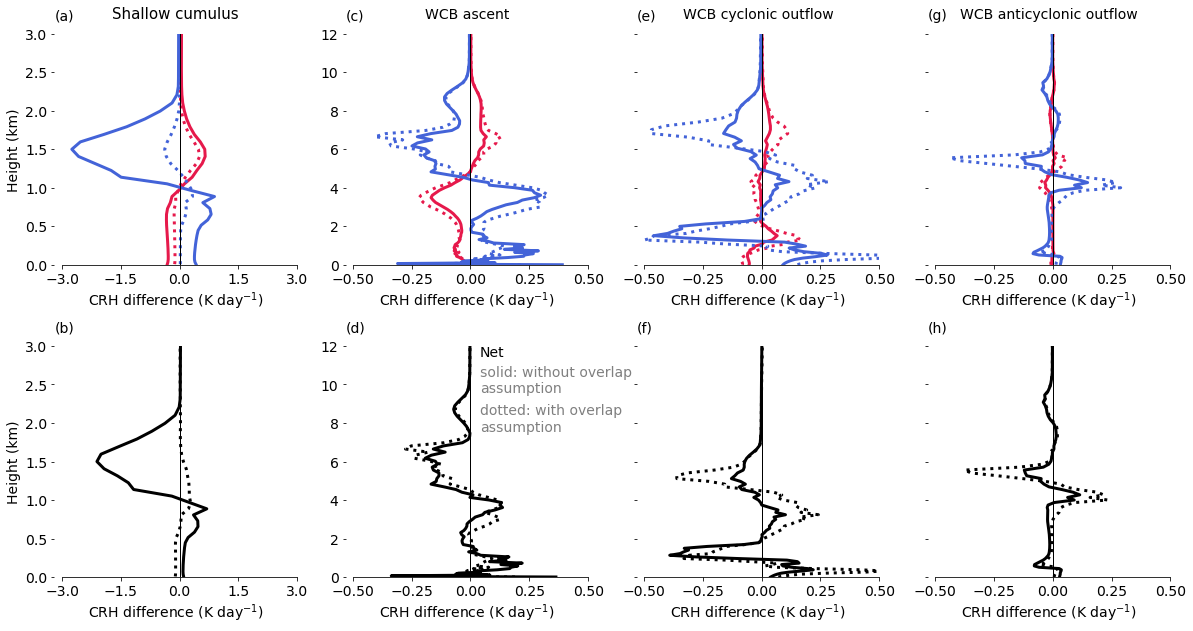

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
i = 0

z = ds_out['z_mc']

for ax in axes.flat:
    ax.tick_params(labelsize=14)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    
    if i == 0:
        # SW diff
        difflw_1 = ds_out['lwcrh_mean_nwp_dom01'].values - ds_out['lwcrh_mean_lem_dom01'].values
        difflw_2 = ds_out['lwcrh_mean_nwpfr_dom01'].values - ds_out['lwcrh_mean_lem_dom01'].values
        # LW diff
        diffsw_1 = ds_out['swcrh_mean_nwp_dom01'].values - ds_out['swcrh_mean_lem_dom01'].values
        diffsw_2 = ds_out['swcrh_mean_nwpfr_dom01'].values - ds_out['swcrh_mean_lem_dom01'].values
        
        ax.plot(diffsw_1,z,color='#e6194B',lw=3)
        ax.plot(diffsw_2,z,color='#e6194B',linestyle='dotted',lw=3)

        ax.plot(difflw_1,z,color='#4363d8',lw=3)
        ax.plot(difflw_2,z,color='#4363d8',linestyle='dotted',lw=3)
        
        ax.spines['bottom'].set_bounds(-3,3)
        ax.set_xticks(np.linspace(-3,3,5))
        ax.set_xlim([-3.2,3])
        ax.set_ylim([0,3])
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_title('Shallow cumulus', fontsize=15,pad=15)
        ax.set_ylabel('Height (km)', fontsize=14)
        ax.set_xlabel('CRH difference (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.text(0.0, 1.06, '(a)', transform=ax.transAxes, 
            size=14)
        
        lg=colorlegend.color_legend(ax,loc=1,fsize=14)
        
    if i == 1:
        
        # SW diff
        difflw_1 = ds_out['lwcrh_mean_nwp_dom02'].values - ds_out['lwcrh_mean_lem_dom02'].values
        difflw_2 = ds_out['lwcrh_mean_nwpfr_dom02'].values - ds_out['lwcrh_mean_lem_dom02'].values
        # LW diff
        diffsw_1 = ds_out['swcrh_mean_nwp_dom02'].values - ds_out['swcrh_mean_lem_dom02'].values
        diffsw_2 = ds_out['swcrh_mean_nwpfr_dom02'].values - ds_out['swcrh_mean_lem_dom02'].values
        
        ax.plot(diffsw_1,z,color='#e6194B',lw=3)
        ax.plot(diffsw_2,z,color='#e6194B',linestyle='dotted',lw=3)

        ax.plot(difflw_1,z,color='#4363d8',lw=3)
        ax.plot(difflw_2,z,color='#4363d8',linestyle='dotted',lw=3)
        
        ax.spines['bottom'].set_bounds(-0.5,0.5)
        ax.set_xticks(np.linspace(-0.5,0.5,5))
        ax.set_xlim([-0.53,0.5])
        ax.set_ylim([0,12])
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_title('WCB ascent', fontsize=14,pad=15)
        ax.set_xlabel('CRH difference (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.text(0.0, 1.06, '(c)', transform=ax.transAxes, 
            size=14)
        
    if i == 2:
        # SW diff
        difflw_1 = ds_out['lwcrh_mean_nwp_dom03'].values - ds_out['lwcrh_mean_lem_dom03'].values
        difflw_2 = ds_out['lwcrh_mean_nwpfr_dom03'].values - ds_out['lwcrh_mean_lem_dom03'].values
        # LW diff
        diffsw_1 = ds_out['swcrh_mean_nwp_dom03'].values - ds_out['swcrh_mean_lem_dom03'].values
        diffsw_2 = ds_out['swcrh_mean_nwpfr_dom03'].values - ds_out['swcrh_mean_lem_dom03'].values
        
        ax.plot(diffsw_1,z,color='#e6194B',lw=3)
        ax.plot(diffsw_2,z,color='#e6194B',linestyle='dotted',lw=3)

        ax.plot(difflw_1,z,color='#4363d8',lw=3)
        ax.plot(difflw_2,z,color='#4363d8',linestyle='dotted',lw=3)

        ax.spines['bottom'].set_bounds(-0.5,0.5)
        ax.set_xticks(np.linspace(-0.5,0.5,5))
        ax.set_xlim([-0.53,0.5])
        ax.set_ylim([0,9])
        ax.set_yticks(np.arange(0,9.5,1.5))
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_title('WCB cyclonic outflow', fontsize=14,pad=15)
        ax.set_yticklabels([])
        ax.set_xlabel('CRH difference (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.text(0.0, 1.06, '(e)', transform=ax.transAxes, 
            size=14)
        
    if i == 3:
        # SW diff
        difflw_1 = ds_out['lwcrh_mean_nwp_dom04'].values - ds_out['lwcrh_mean_lem_dom04'].values
        difflw_2 = ds_out['lwcrh_mean_nwpfr_dom04'].values - ds_out['lwcrh_mean_lem_dom04'].values
        # LW diff
        diffsw_1 = ds_out['swcrh_mean_nwp_dom04'].values - ds_out['swcrh_mean_lem_dom04'].values
        diffsw_2 = ds_out['swcrh_mean_nwpfr_dom04'].values - ds_out['swcrh_mean_lem_dom04'].values
        
        ax.plot(diffsw_1,z,color='#e6194B',lw=3)
        ax.plot(diffsw_2,z,color='#e6194B',linestyle='dotted',lw=3)

        ax.plot(difflw_1,z,color='#4363d8',lw=3)
        ax.plot(difflw_2,z,color='#4363d8',linestyle='dotted',lw=3)
        
        ax.spines['bottom'].set_bounds(-0.5,0.5)
        ax.set_xticks(np.linspace(-0.5,0.5,5))
        ax.set_xlim([-0.53,0.5])
        ax.set_ylim([0,12])
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_title('WCB anticyclonic outflow', fontsize=14,pad=15)
        ax.set_yticklabels([])
        ax.set_xlabel('CRH difference (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.text(0.0, 1.06, '(g)', transform=ax.transAxes, 
            size=14)                
                           
    if i == 4:
        
        # SW diff
        difflw_1 = ds_out['lwcrh_mean_nwp_dom01'].values - ds_out['lwcrh_mean_lem_dom01'].values
        difflw_2 = ds_out['lwcrh_mean_nwpfr_dom01'].values - ds_out['lwcrh_mean_lem_dom01'].values
        # LW diff
        diffsw_1 = ds_out['swcrh_mean_nwp_dom01'].values - ds_out['swcrh_mean_lem_dom01'].values
        diffsw_2 = ds_out['swcrh_mean_nwpfr_dom01'].values - ds_out['swcrh_mean_lem_dom01'].values
        
        # net diff
        diffnt_1 = difflw_1 + diffsw_1
        diffnt_2 = difflw_2 + diffsw_2
        
        ax.plot(diffnt_1,z,color='#000000',label='net',lw=3)
        ax.plot(diffnt_2,z,color='#000000',linestyle='dotted',label='net',lw=3)
        
        ax.spines['bottom'].set_bounds(-3,3)
        ax.set_xticks(np.linspace(-3,3,5))
        ax.set_xlim([-3.2,3])
        ax.set_ylim([0,3])
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_ylabel('Height (km)', fontsize=14)
        ax.set_xlabel('CRH difference (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.text(0.0, 1.06, '(b)', transform=ax.transAxes, 
            size=14)
        
    if i == 5:
        
        # SW diff
        difflw_1 = ds_out['lwcrh_mean_nwp_dom02'].values - ds_out['lwcrh_mean_lem_dom02'].values
        difflw_2 = ds_out['lwcrh_mean_nwpfr_dom02'].values - ds_out['lwcrh_mean_lem_dom02'].values
        # LW diff
        diffsw_1 = ds_out['swcrh_mean_nwp_dom02'].values - ds_out['swcrh_mean_lem_dom02'].values
        diffsw_2 = ds_out['swcrh_mean_nwpfr_dom02'].values - ds_out['swcrh_mean_lem_dom02'].values
        
        # net diff
        diffnt_1 = difflw_1 + diffsw_1
        diffnt_2 = difflw_2 + diffsw_2
        
        ax.plot(diffnt_1,z,color='#000000',label='net',lw=3)
        ax.plot(diffnt_2,z,color='#000000',linestyle='dotted',label='net',lw=3)
        
        ax.spines['bottom'].set_bounds(-0.5,0.5)
        ax.set_xticks(np.linspace(-0.5,0.5,5))
        ax.set_xlim([-0.53,0.5])
        ax.set_ylim([0,12])
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_xlabel('CRH difference (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.text(0.0, 1.06, '(d)', transform=ax.transAxes, 
            size=14)
        
        
        ax.text(0.04, 12, "Net", color="black", size=14, va="top")
        ax.text(0.04, 11, "solid: without overlap\nassumption", color="gray", size=14, va="top")
        ax.text(0.04, 9, "dotted: with overlap\nassumption", color="gray", size=14, va="top")
        
    if i == 6:
        
        # SW diff
        difflw_1 = ds_out['lwcrh_mean_nwp_dom03'].values - ds_out['lwcrh_mean_lem_dom03'].values
        difflw_2 = ds_out['lwcrh_mean_nwpfr_dom03'].values - ds_out['lwcrh_mean_lem_dom03'].values
        # LW diff
        diffsw_1 = ds_out['swcrh_mean_nwp_dom03'].values - ds_out['swcrh_mean_lem_dom03'].values
        diffsw_2 = ds_out['swcrh_mean_nwpfr_dom03'].values - ds_out['swcrh_mean_lem_dom03'].values
        
        # net diff
        diffnt_1 = difflw_1 + diffsw_1
        diffnt_2 = difflw_2 + diffsw_2
        
        ax.plot(diffnt_1,z,color='#000000',label='net',lw=3)
        ax.plot(diffnt_2,z,color='#000000',linestyle='dotted',label='net',lw=3)

        ax.spines['bottom'].set_bounds(-0.5,0.5)
        ax.set_xticks(np.linspace(-0.5,0.5,5))
        ax.set_xlim([-0.53,0.5])
        ax.set_ylim([0,12])
        ax.set_yticklabels([])
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_xlabel('CRH difference (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.text(0.0, 1.06, '(f)', transform=ax.transAxes, 
            size=14)
        
    if i == 7:
        
        # SW diff
        difflw_1 = ds_out['lwcrh_mean_nwp_dom04'].values - ds_out['lwcrh_mean_lem_dom04'].values
        difflw_2 = ds_out['lwcrh_mean_nwpfr_dom04'].values - ds_out['lwcrh_mean_lem_dom04'].values
        # LW diff
        diffsw_1 = ds_out['swcrh_mean_nwp_dom04'].values - ds_out['swcrh_mean_lem_dom04'].values
        diffsw_2 = ds_out['swcrh_mean_nwpfr_dom04'].values - ds_out['swcrh_mean_lem_dom04'].values
        
        # net diff
        diffnt_1 = difflw_1 + diffsw_1
        diffnt_2 = difflw_2 + diffsw_2
        
        ax.plot(diffnt_1,z,color='#000000',label='net',lw=3)
        ax.plot(diffnt_2,z,color='#000000',linestyle='dotted',label='net',lw=3)
        
        ax.spines['bottom'].set_bounds(-0.5,0.5)
        ax.set_xticks(np.linspace(-0.5,0.5,5))
        ax.set_xlim([-0.53,0.5])
        ax.set_ylim([0,12])
        ax.set_yticklabels([])
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_xlabel('CRH difference (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.text(0.0, 1.06, '(h)', transform=ax.transAxes, 
            size=14)    
        
    i = i + 1

    
fig.subplots_adjust(wspace=0.2,hspace=0.35)

plt.savefig('figure9.pdf', bbox_inches = 'tight')
#plt.savefig('figure9.png', bbox_inches = 'tight',dpi=300)    

In [27]:
client.close()